# Random Forests

**Description**

Is an ensemble of decision trees.

Selecting random subsets of features to split classification data on.

Each tree gives its prediction on a label and you take the most common predictioin.

Random forests can be used for regression models. Take the average of predicted values from all trees in the forest.

**Hyperparameters**

Has a lot of the hyperparameters that decision trees have.

n_estimators : how many trees to use?

max_features : how many features to use in each random subset?

bootstrap : should we allow for bootstrap sampling in each subset?

oobe (out of bag error): calculate OOB error during training?

**Bootsrap**

Bootstrapping: process of random sampling with replacement. Helps reduce correlation between tress.

Ex: [A, B, C, D, E]

Random sampling with replacement: A, B, A, E, D, C, C, E, A

**Out of bag error**

OOE: When you use bootsrap, there will be some data that doesn't go into training the individual trees and we can use said data to test the tree's accuracy.

Answers the question: would you like to keep track of the OOB error?

### Random forest classifier

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/penguins_size.csv')

In [6]:
df = df.dropna()

In [7]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [8]:
y = df['species']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# random state helps ensure we create the same random trees
rfc = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [13]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [14]:
preds = rfc.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

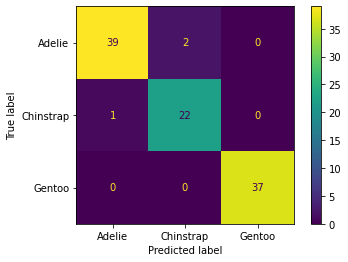

In [18]:
plot_confusion_matrix(rfc, X_test, y_test);

In [19]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



### Random forest classifier example 2

In [20]:
df = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/data_banknote_authentication.csv')

In [21]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


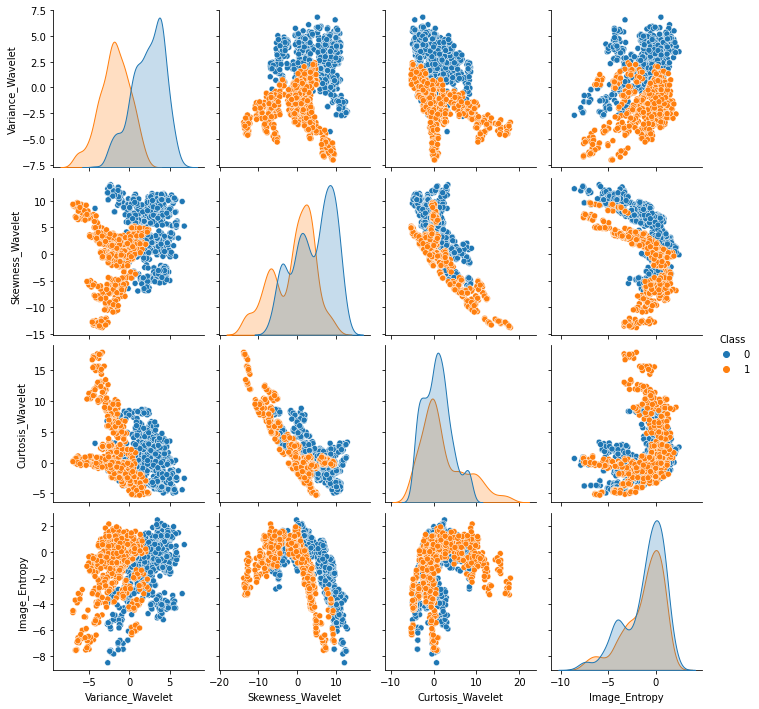

In [25]:
sns.pairplot(df,hue='Class');

In [26]:
X = df.drop('Class', axis=1)

In [27]:
y = df['Class']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
n_estimators = [64, 100, 128, 200]

In [33]:
max_features = [2, 3, 4]

In [37]:
bootstrap = [True, False]

In [38]:
oob_score = [True, False]

In [39]:
param_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'bootstrap':bootstrap, 'oob_score':oob_score}

In [40]:
rfc = RandomForestClassifier()

In [41]:
grid = GridSearchCV(rfc, param_grid)

In [42]:
grid.fit(X_train, y_train)

/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.99485345 0.99399508 0.99314038 0.99399875 0.99485712 0.99399875
 0.99314038 0.99314038 0.99228201 0.99314038 0.99399875 0.99314038
 0.99314038 0.99228201 0.99314038 0.99399875 0.98627343 0.98799017
 0.98627343 0.98884854 0.98799017 0.98799017 0.98799017 0.98799017
        nan 0.99399142        nan 0.99484979        nan 0.99313305
        nan 0.99399142        nan 0.98884854        nan 0.99227835
        nan 0.99056161        nan 0.99228201        nan 0.97770441
        nan 0.97684604        nan 0.97770441        nan 0.97941381]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [43]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [44]:
rfc = RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [45]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [46]:
rfc.oob_score_

0.9948542024013722

In [47]:
predictions = rfc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



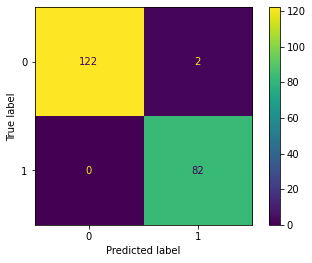

In [50]:
plot_confusion_matrix(rfc, X_test, y_test);

In [53]:
# looping to get the performance per amount of n_estimators
errors = []
misclassifications = []

for n in range(1, 200):
    
    rfc = RandomForestClassifier(n_estimators=n, max_features=2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

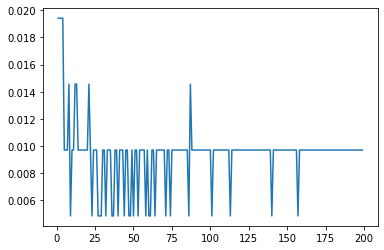

In [55]:
# trying to find a point of necessary n estimators
plt.plot(range(1, 200), errors);

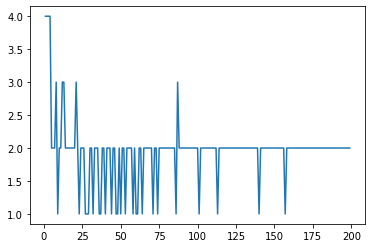

In [56]:
# trying to find a point of necessary n estimators
plt.plot(range(1, 200), misclassifications)

### Trying to fit a model to a sine curve

**First trying to use linear regression**

In [57]:
df = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/rock_density_xray.csv')

In [58]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [59]:
df.columns = ['Signal', 'Density']

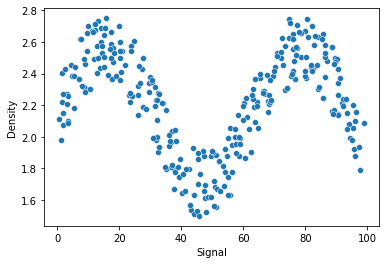

In [61]:
sns.scatterplot(x='Signal', y='Density', data=df);

In [68]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr_model = LinearRegression()

In [73]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [74]:
lr_preds = lr_model.predict(X_test)

In [75]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [78]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [82]:
signal_range = np.arange(0,100)

In [83]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

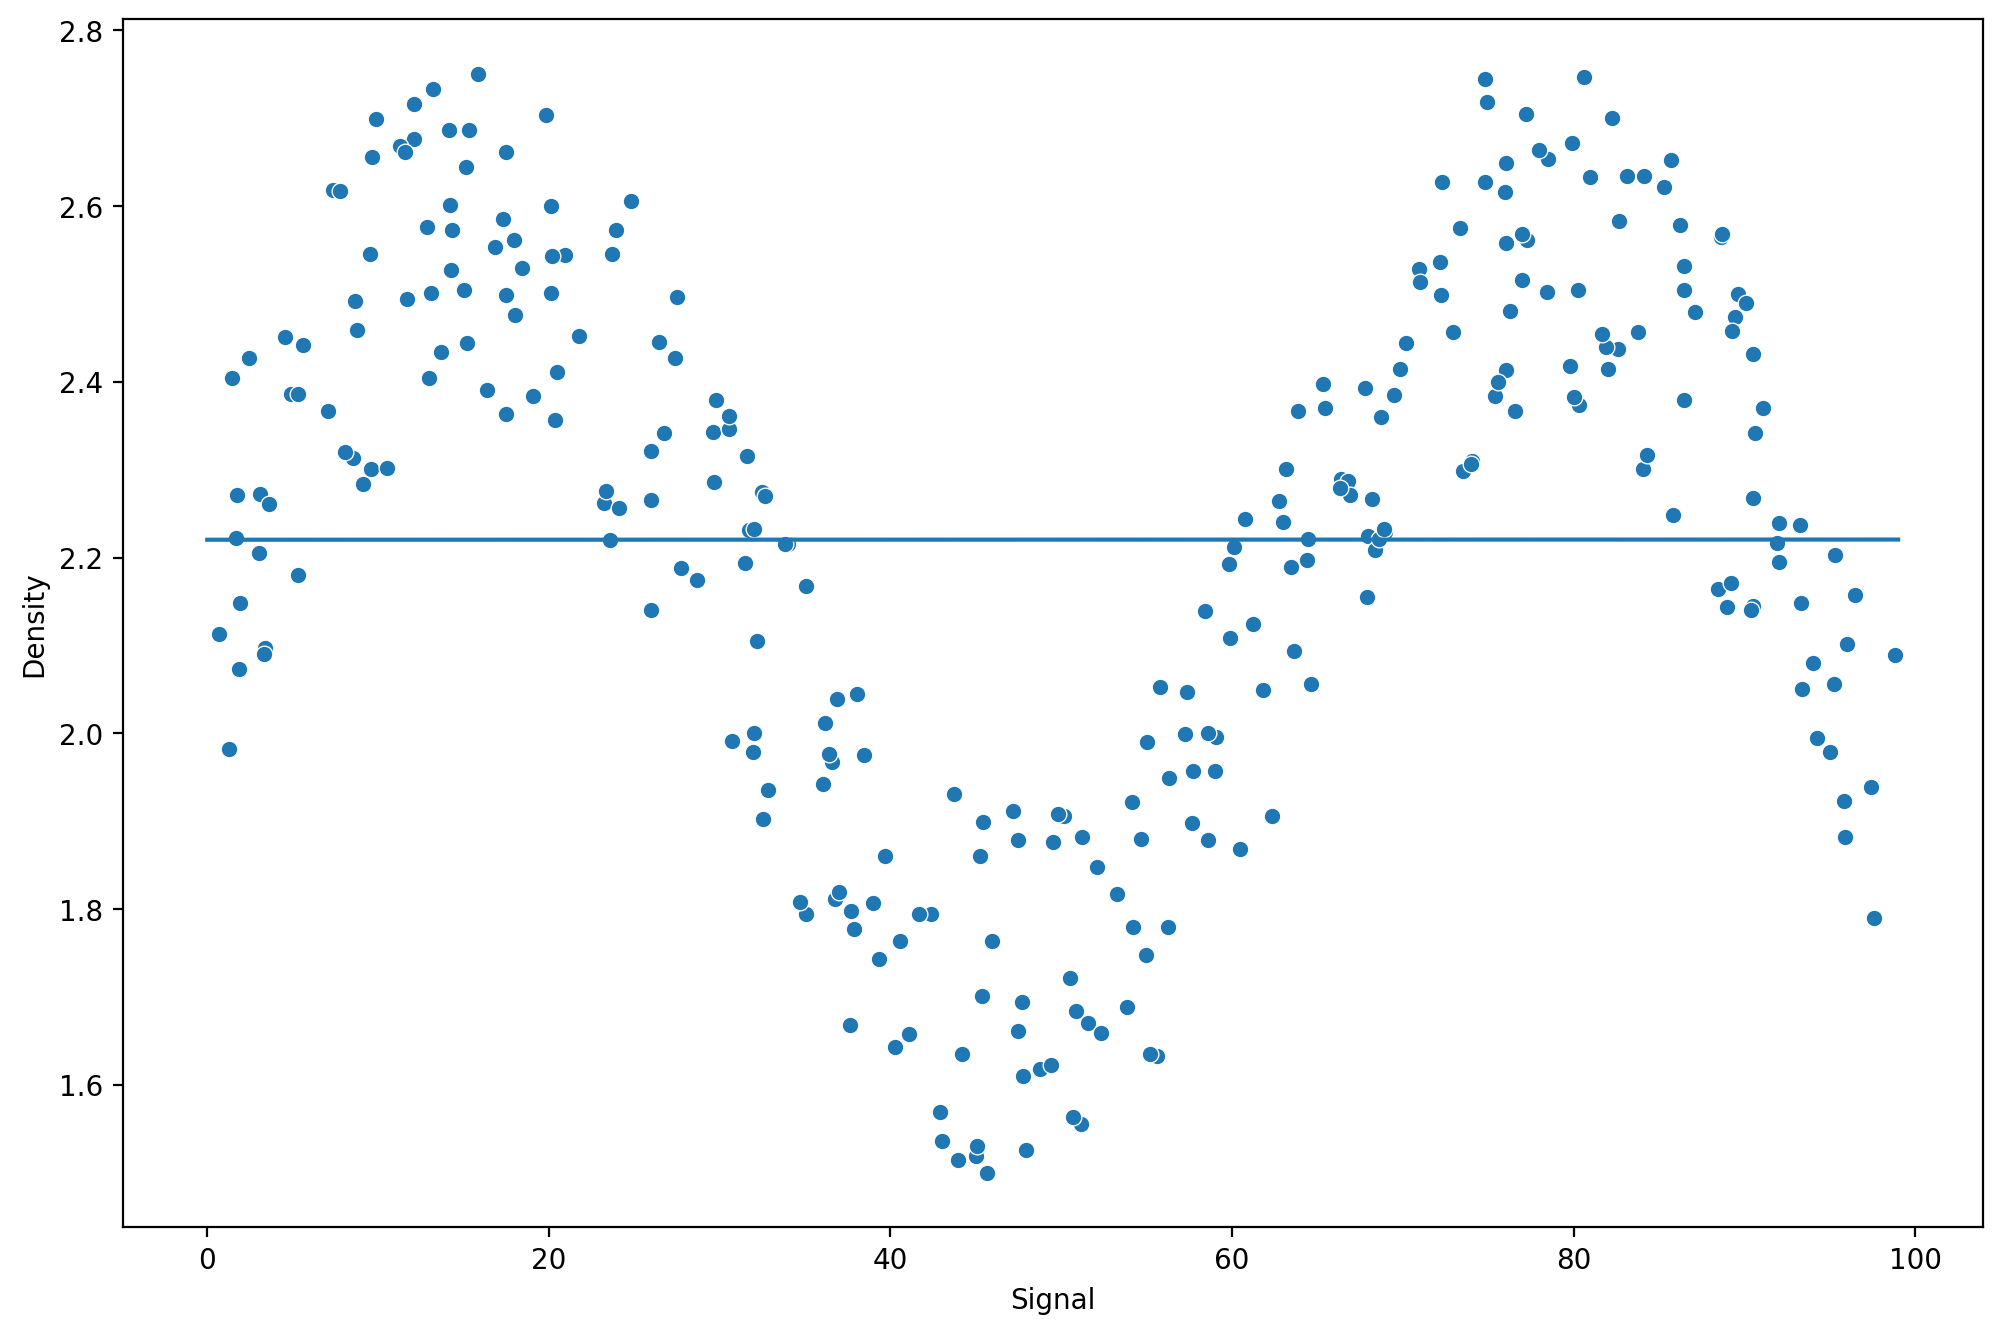

In [85]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds)

We first tried to use linear regression to solve the problem and although we got somewhat decent performance metrics, once we plot it out we actually realize the error of the prediction.

**Now will try to use polynomial regression**

In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [120]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE : {mae}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [121]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [122]:
pipe = make_pipeline(PolynomialFeatures(5),LinearRegression())

RMSE : 0.14452815271987038
MAE : 0.11864314470983892


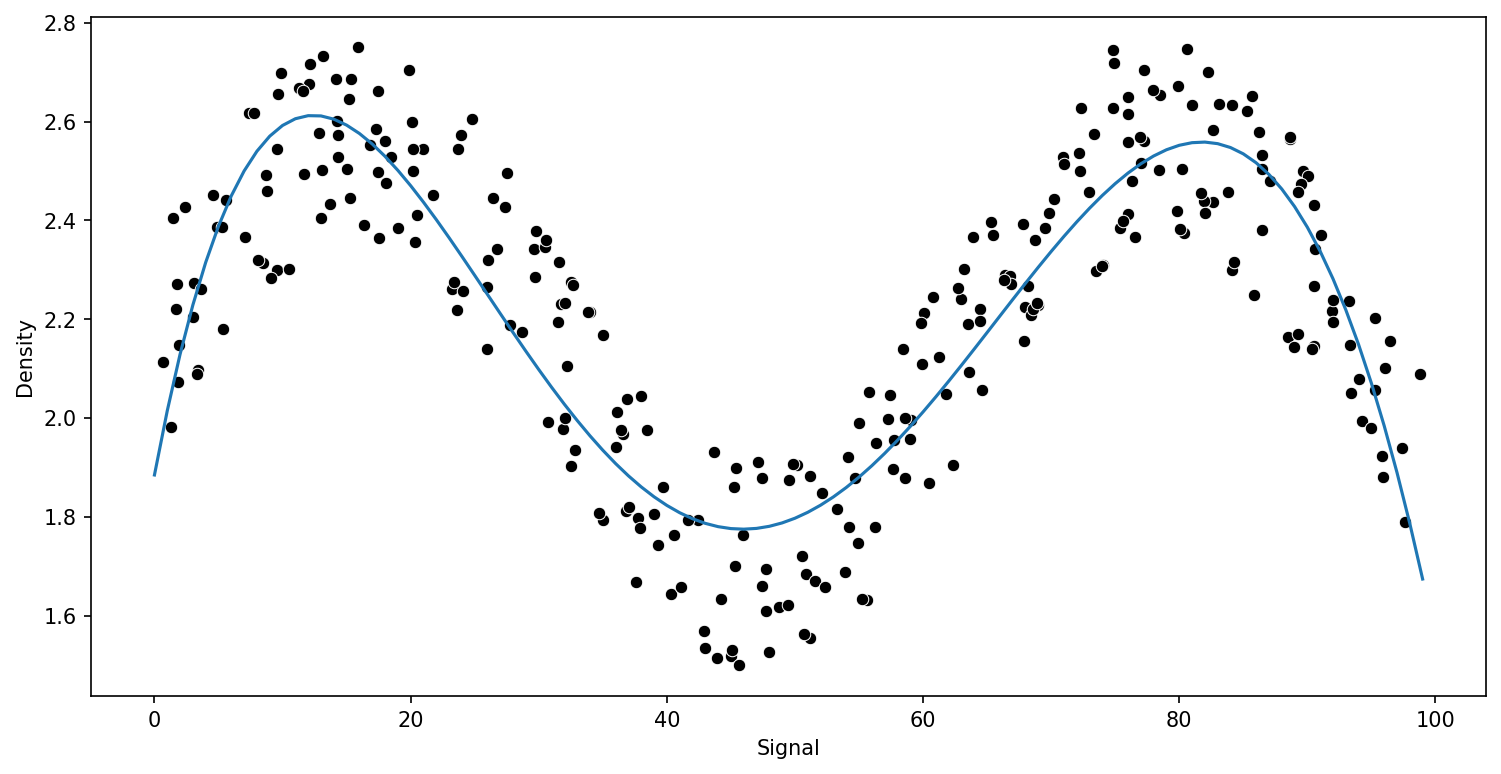

In [123]:
run_model(pipe, X_train, y_train, X_test, y_test)

**Advanced models**

In [128]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

RMSE : 0.1523487028635337
MAE : 0.11877297474442378
RMSE : 0.13730685016923647
MAE : 0.12198383614100558
RMSE : 0.13277855732740926
MAE : 0.11635971693292672


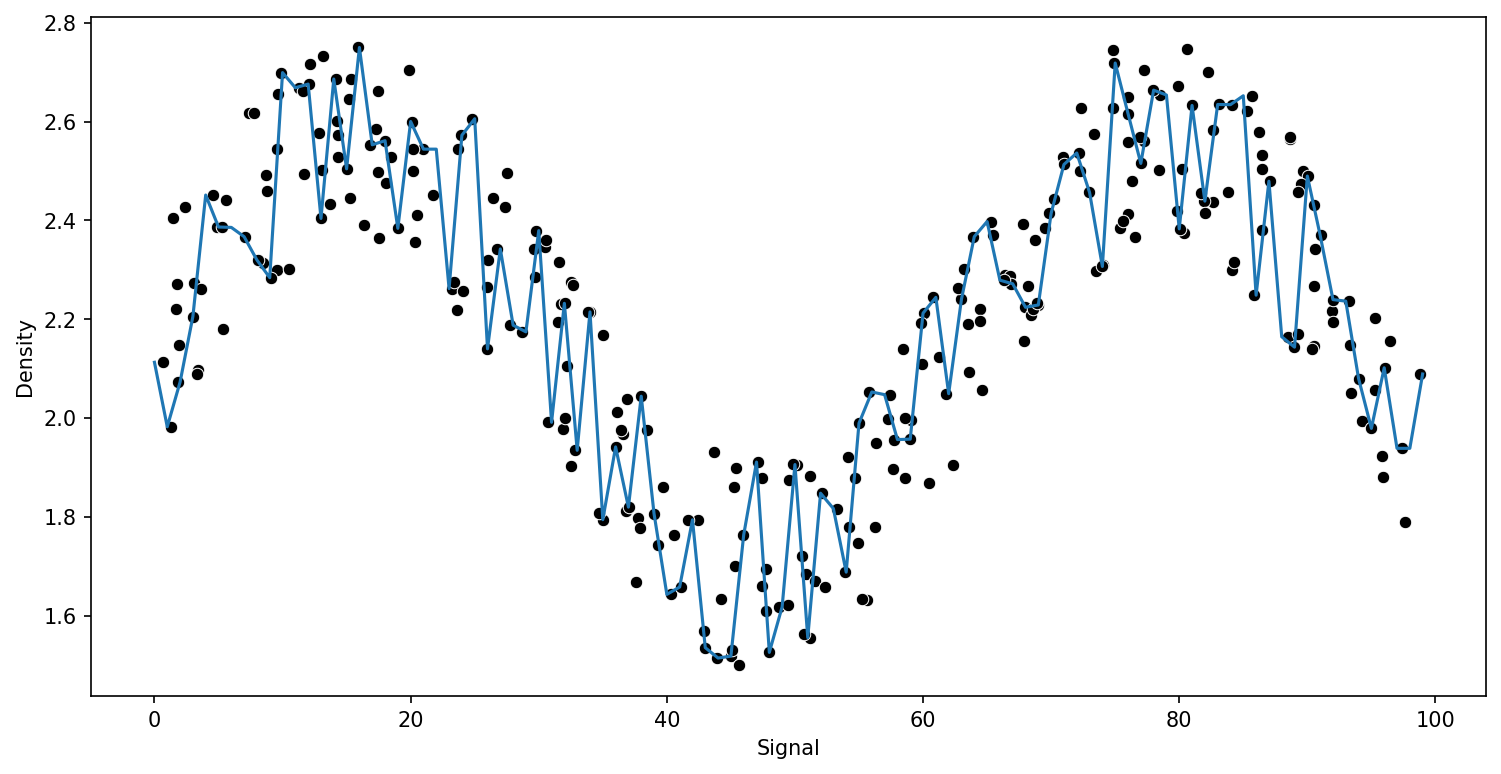

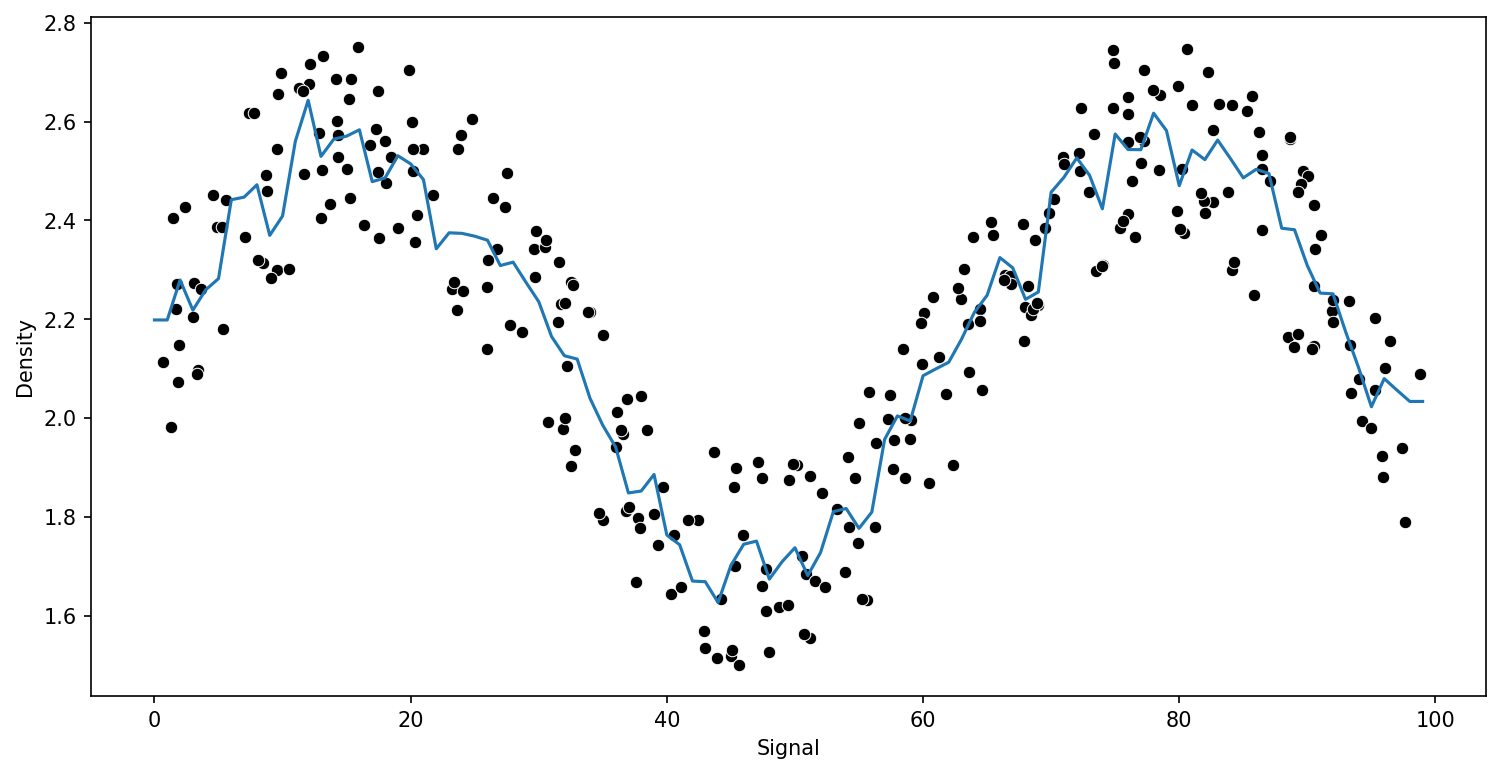

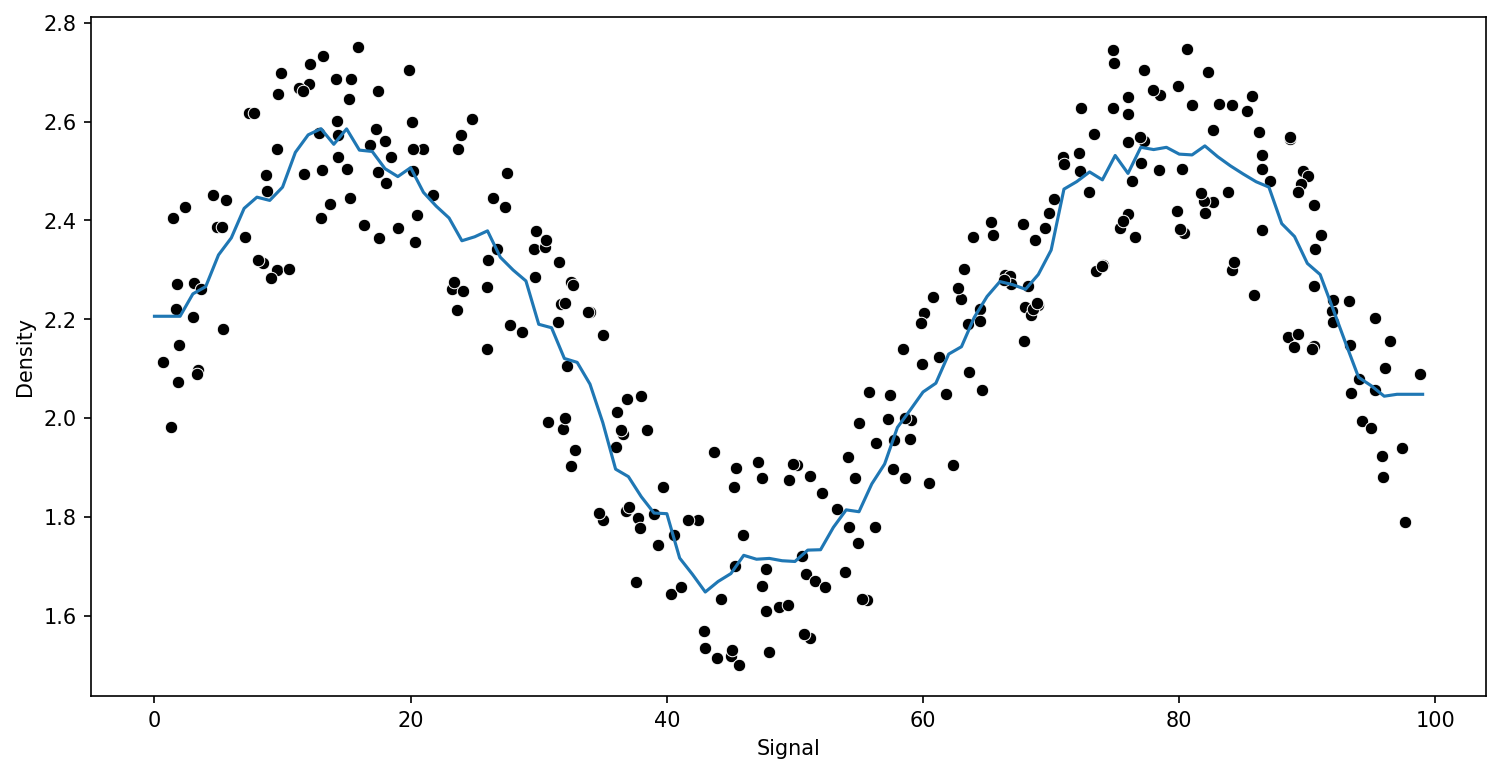

In [125]:
# nearest neighbors
k_values = [1, 5, 10]

for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

RMSE : 0.1523487028635337
MAE : 0.11877297474442378


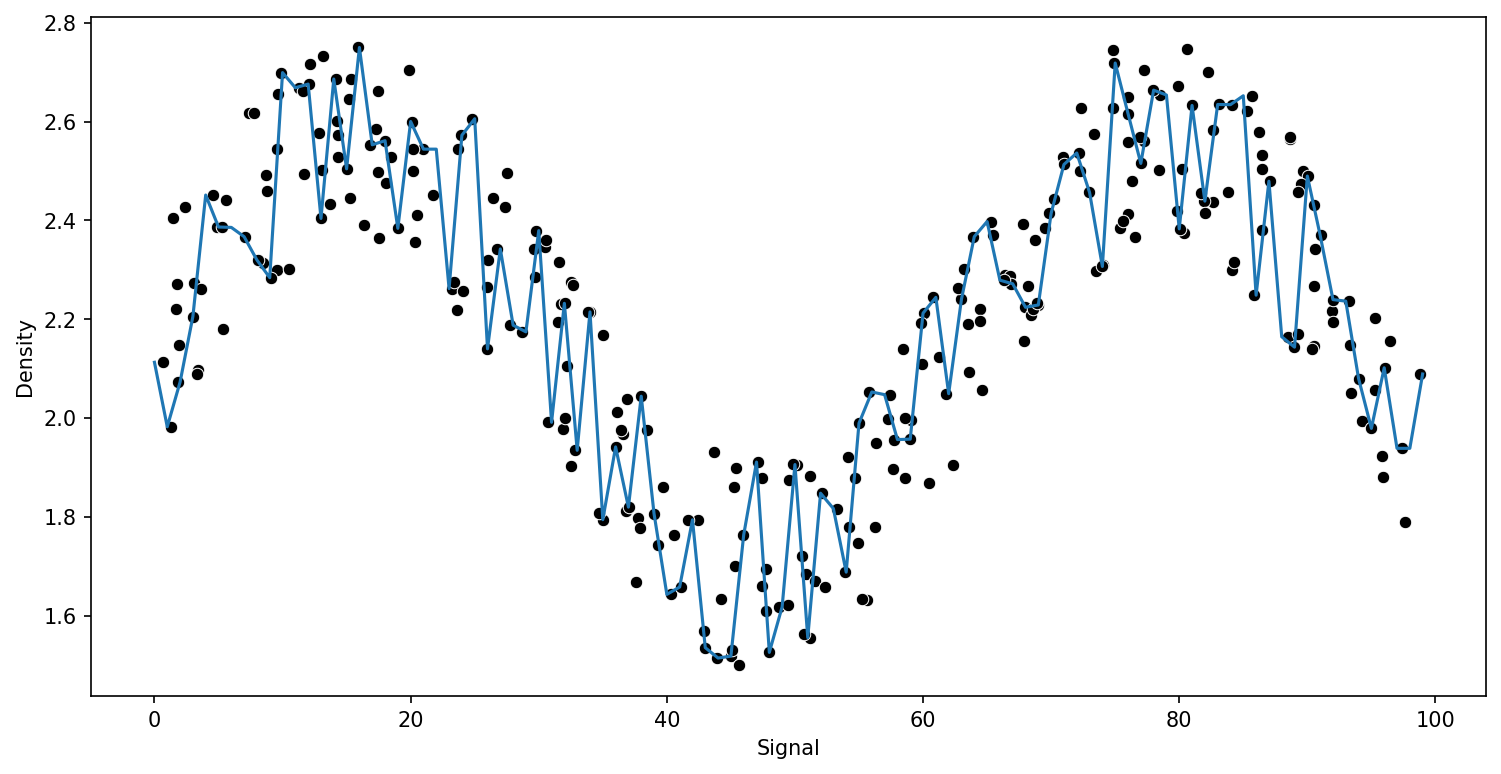

In [127]:
# decision tree regressor
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [129]:
# support vectors
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C':[0.01, 0,1, 1, 5, 10, 100, 1000], 'gamma':['auto','scale']}

grid = GridSearchCV(svr, param_grid)

/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/modeedna/opt/anaconda3/lib/python3.9/site-pack

RMSE : 0.12646999302046696
MAE : 0.10854210121348368


/Users/modeedna/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [ 0.11661693  0.49611358         nan         nan  0.71070595  0.80490484
  0.71070595  0.80490484  0.67106203  0.80395049  0.61816182  0.80394974
  0.31490892  0.80718355 -1.05793335  0.81149958]
  warnings.warn(


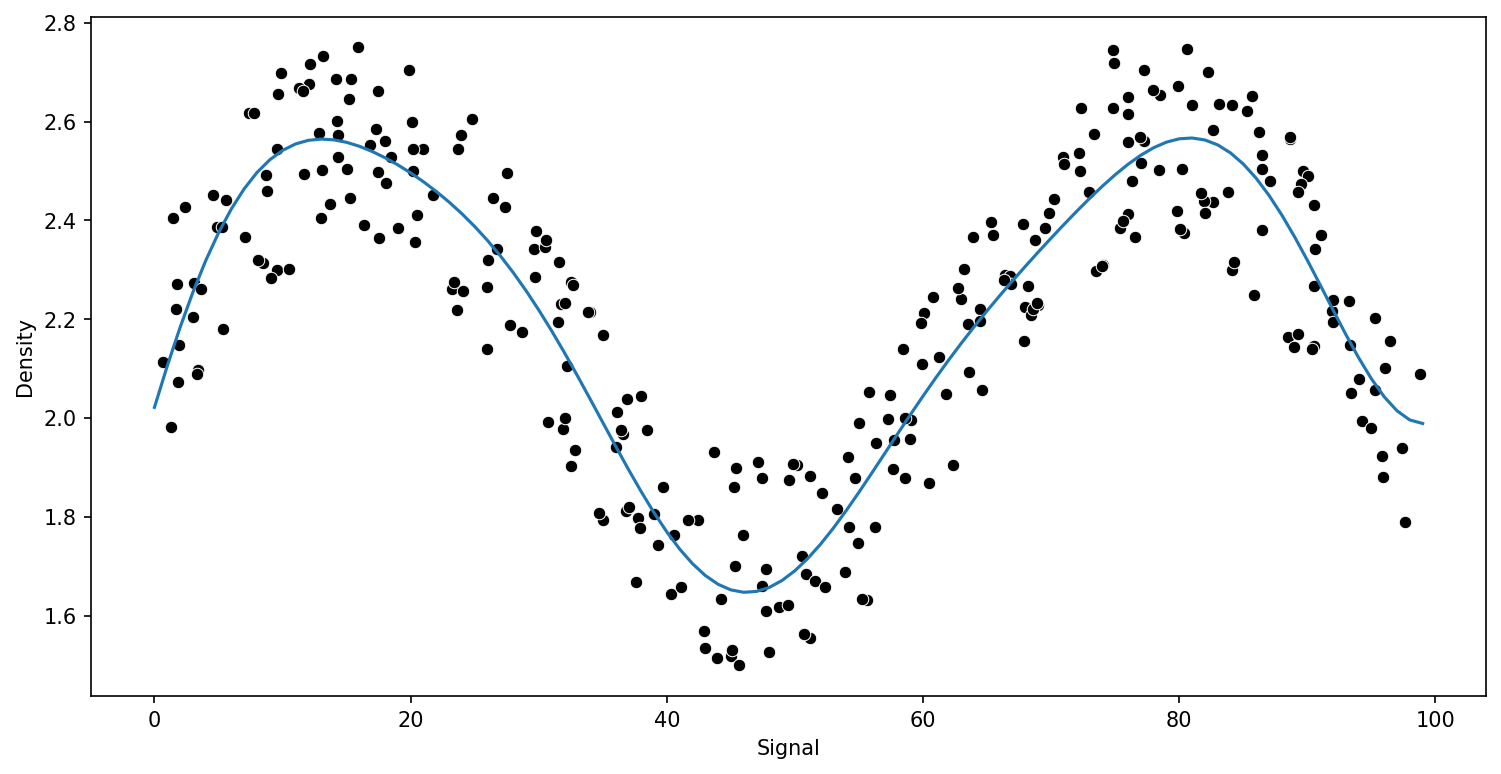

In [130]:
run_model(grid, X_train, y_train, X_test, y_test)

In [131]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [132]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE : 0.13798711588090218
MAE : 0.1182924953722595


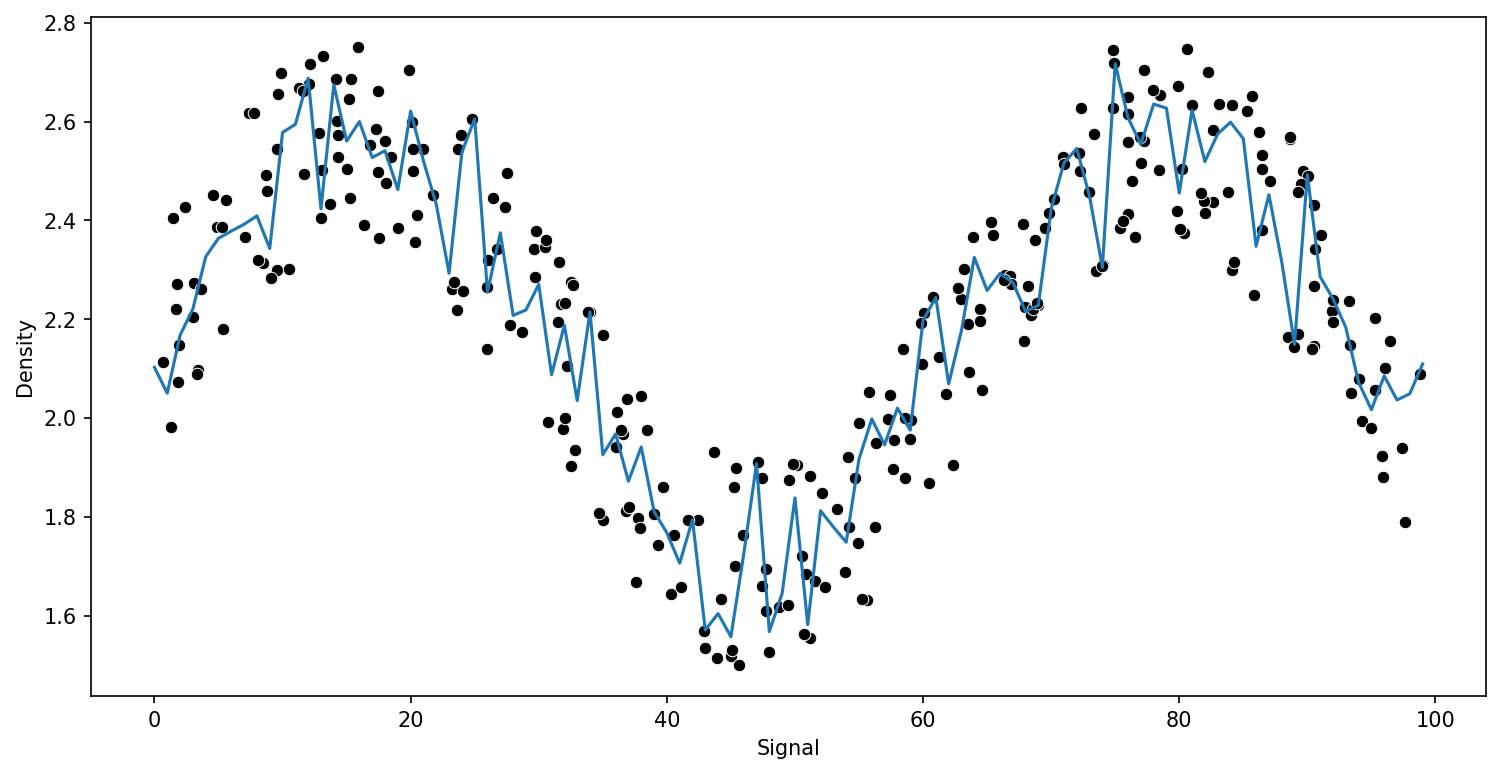

In [133]:
run_model(rfr, X_train, y_train, X_test, y_test)